## Исследуем набор данных о видеоиграх, объем продаж которых составил более 100 000 копий.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
games = pd.read_csv('games.csv')

## Первый шаг – загрузить данные и убедиться, что всё считалось правильно: посмотреть на столбцы, типы данных, размерность, наличие пропущенных значений.

In [4]:
games.head()

Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37

In [5]:
games.dtypes

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

In [6]:
games.shape

(16598, 11)

In [7]:
games_by_year.Year

NameError: name 'games_by_year' is not defined

## В каком столбце встретилось больше всего пропущенных значений?

In [8]:
games.isna().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [9]:
games = games.dropna()

In [12]:
games.shape

(16291, 11)

## Выведите описательные характеристики переменной Year и постройте график распределения количества выпущенных игр по годам.

In [13]:
games_by_year = games.groupby('Year',as_index=False) \
    .agg({'Name':'count'}) \
    .rename(columns={'Name':'Releases'})

In [14]:
games_by_year = games_by_year.astype({'Year':'int64'})

In [15]:
games_by_year['Percent'] = (games_by_year.Releases * 100)/games_by_year.Releases.sum()

In [16]:
games_by_year.describe()

Year     Releases    Percent
count    39.000000    39.000000  39.000000
mean   1999.051282   417.717949   2.564103
std      11.493588   450.905344   2.767819
min    1980.000000     1.000000   0.006138
25%    1989.500000    19.000000   0.116629
50%    1999.000000   289.000000   1.773986
75%    2008.500000   699.500000   4.293782
max    2020.000000  1431.000000   8.783991

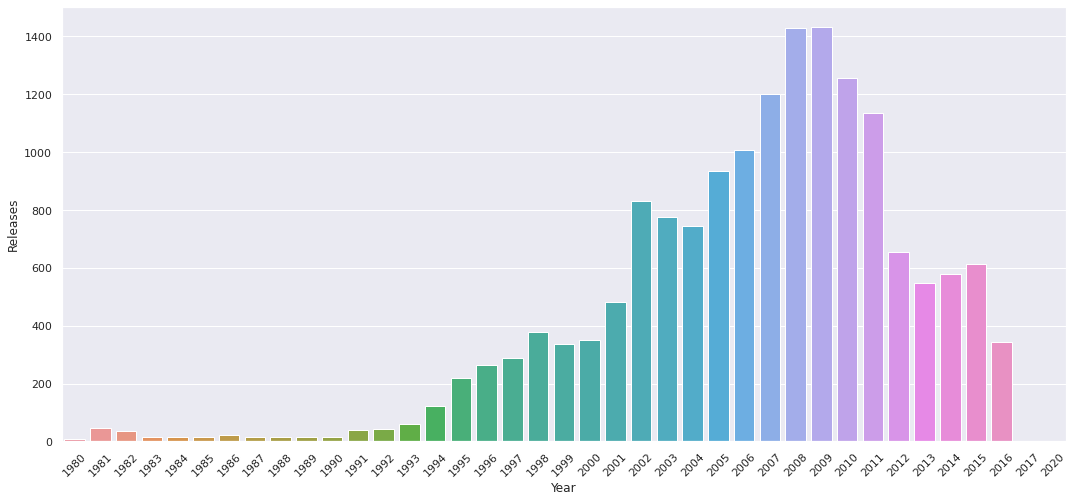

In [18]:
plt.xticks(rotation=45)
sns.set(rc = {'figure.figsize':(18,8)})
sns.barplot(x='Year',y='Releases', data = games_by_year)


## На каких платформах произошло больше всего релизов? Оставьте названия только тех платформ, частота встречаемости которых составляет более 7%. Значения укажите в порядке убывания частоты встречаемости через запятую с пробелом.

In [47]:
games.Platform.value_counts(normalize=True) >0.07

DS       True
PS2      True
PS3      True
Wii      True
X360     True
PSP      True
PS       True
PC      False
XB      False
GBA     False
GC      False
3DS     False
PSV     False
PS4     False
N64     False
SNES    False
XOne    False
SAT     False
WiiU    False
2600    False
NES     False
GB      False
DC      False
GEN     False
NG      False
SCD     False
WS      False
3DO     False
TG16    False
PCFX    False
GG      False
Name: Platform, dtype: bool

## Игры каких издателей (Publisher) встречаются в датасете чаще всего? В качестве ответа укажите наибольшую абсолютную частоту встречаемости.

In [45]:
games.Publisher.value_counts(normalize=False).head(1)

Electronic Arts    1339
Name: Publisher, dtype: int64

## Сфокусируемся на играх от Nintendo. Посчитайте среднее, медиану и стандартное отклонение по продажам игр данного издателя в разных регионах (NA, EU, JP, Other). В каком регионе медианное значение объема продаж является наибольшим?

In [57]:
games.query('Publisher == "Nintendo"')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].describe()

NA_Sales    EU_Sales    JP_Sales  Other_Sales
count  696.000000  696.000000  696.000000   696.000000
mean     1.172055    0.601006    0.653721     0.136767
std      2.989913    1.743953    1.063110     0.464170
min      0.000000    0.000000    0.000000     0.000000
25%      0.010000    0.007500    0.090000     0.000000
50%      0.375000    0.120000    0.280000     0.030000
75%      0.972500    0.482500    0.740000     0.090000
max     41.490000   29.020000   10.220000     8.460000

## Теперь посмотрим на продажи Nintendo в Японии по жанрам. Постройте боксплот, где: по оси x будет расположен жанр игры (Genre) по оси у – объем продаж в Японии (JP_sales) Взглянем на получившиеся боксплоты. Что мы можем по ним сказать о данных?

In [75]:
Nintendo_JP_Sales_Genre = games.query('Publisher == "Nintendo"')[['Genre','JP_Sales']]

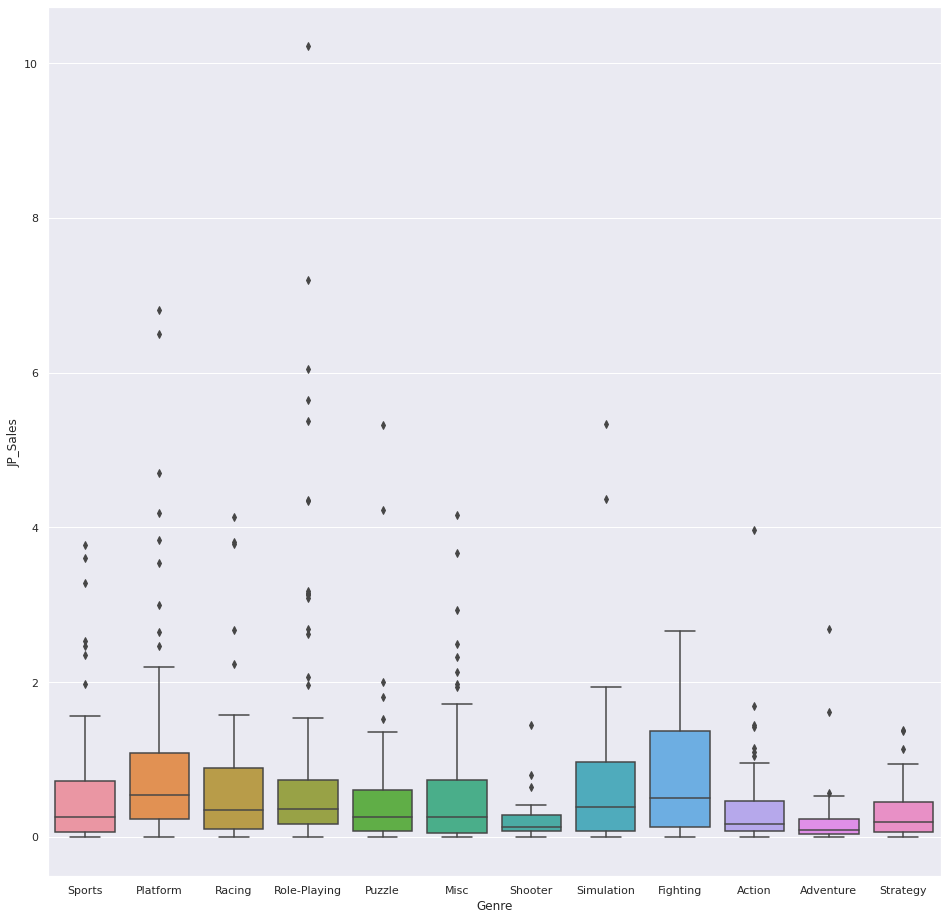

In [76]:
plt.figure(figsize=(16,16))
sns.boxplot(x='Genre', y = 'JP_Sales', data=Nintendo_JP_Sales_Genre)

   ## Подходящие выводы: 
   ### Медианное значение продаж игр жанра Fighting выше, чем у игр Simulation
   ### Наибольший межквартильный размах наблюдается у игр жанра Fighting
   ### Межквартильный размах у Strategy меньше, чем у Puzzle

## Визуализируйте динамику изменения объема мировых продаж (Global_Sales) по годам для игр Nintendo следующих жанров: Fighting, Simulation, Platform, Racing, Sports.На каком отрезке времени игры жанра Sports были наиболее популярны? Иными словами, выберите наименьший отрезок, который включает в себя несколько крупных пиков. 

In [81]:
genre_list = ['Fighting','Simulation','Platform','Racing','Sports']

In [116]:
Nintendo_by_Year_Global = games.query('Publisher == "Nintendo"')[['Year','Genre','Global_Sales']] \
    .query('Genre == @genre_list') \
    .groupby(['Year','Genre'],as_index=False) \
    .agg({'Global_Sales':'sum'})


In [117]:
Nintendo_by_Year_Global.Year = Nintendo_by_Year_Global.Year.astype({'Year':'int64'})

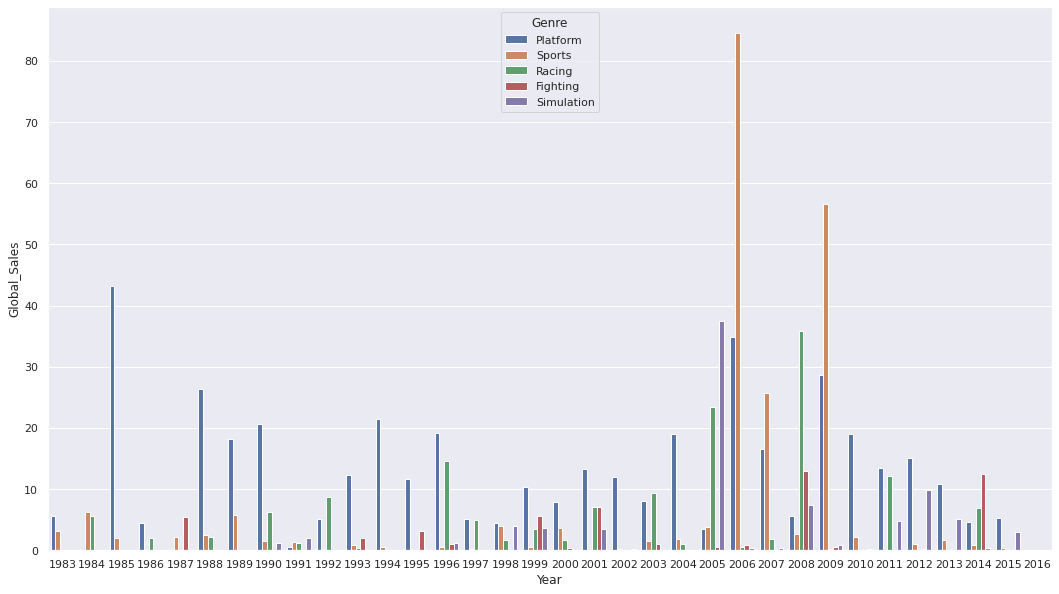

In [125]:
plt.figure(figsize=(18,10))
sns.barplot(x='Year', y='Global_Sales',hue='Genre', data=Nintendo_by_Year_Global)